<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#LGBM-training" data-toc-modified-id="LGBM-training-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LGBM training</a></span><ul class="toc-item"><li><span><a href="#Prepare" data-toc-modified-id="Prepare-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Prepare</a></span></li><li><span><a href="#Core" data-toc-modified-id="Core-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Core</a></span></li><li><span><a href="#Feature-importances" data-toc-modified-id="Feature-importances-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Feature importances</a></span></li></ul></li></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import apps.tkconfig as tkconfig
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
import lightgbm as lgb

SONG = 1
WHO = 7
TRAIN_ORDER = 3

In [2]:
sensor_data = Sensor(verbose=1)

In [3]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order, 4, 2)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, who_id, song_id, pf_order, 4, 2)) 
            
    return pfs

In [4]:
pfs = []
for drumer in range(WHO, WHO + 1):
    ppf = gogo(drumer, SONG, TRAIN_ORDER)
    pfs.append(ppf)

100%|██████████| 3/3 [00:34<00:00, 11.66s/it]


In [5]:
pfs[0][2].event_primitive_df

,hit_type,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,...,R_AZCR,R_GZCR,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR
0,1,0.161398,0.009149,0.226400,27.544187,155.602559,41.476200,0.035198,914.284793,0.136444,...,0.333333,0.333333,0.166667,0.333333,0.741593,0.158599,-0.344552,-0.325007,0.274357,0.441317
1,0,0.051932,0.000320,0.077750,14.292314,25.634203,20.284500,0.003017,229.904437,0.058613,...,0.500000,0.500000,0.500000,0.500000,0.636195,-0.559993,-0.984034,0.504355,0.989369,0.417667
2,0,0.063429,0.000296,0.092800,41.372795,143.525825,61.537600,0.004319,1855.233958,0.057697,...,0.400000,0.400000,0.400000,0.600000,0.688542,-0.429279,0.139237,-0.265110,0.337604,0.748213
3,0,0.146244,0.007067,0.218800,33.530377,288.641965,53.580800,0.028455,1412.928156,0.117970,...,0.200000,0.400000,0.400000,0.200000,-0.981746,-0.814924,0.809214,0.762970,0.875323,0.397144
4,1,0.134168,0.010103,0.196778,38.466623,830.920520,55.346556,0.028104,2310.601591,0.116863,...,0.600000,0.400000,0.600000,0.400000,0.935283,0.490611,0.171105,-0.270527,0.714948,-0.259272
5,0,0.045432,0.000242,0.066000,13.692567,16.121677,18.993429,0.002306,203.608076,0.043290,...,0.333333,0.166667,0.333333,0.166667,0.306249,-0.269981,-0.973191,0.135456,0.109029,0.949058
6,0,0.077618,0.000268,0.122833,43.741896,94.181087,64.167167,0.006292,2007.534539,0.079378,...,0.750000,0.750000,0.500000,0.750000,-0.591846,-0.801130,0.940763,-0.744096,-0.287310,0.713494
7,0,0.183479,0.015068,0.272000,30.820519,508.840634,47.491600,0.048732,1458.745053,0.121165,...,0.200000,0.200000,0.200000,0.200000,-0.470455,-0.433981,0.438249,0.217974,-0.710316,0.501600
8,1,0.213020,0.036626,0.320500,47.796795,573.937465,65.856750,0.082003,2858.471037,0.134325,...,0.333333,0.222222,0.333333,0.111111,0.861114,-0.651689,-0.830610,0.522338,0.915121,0.752960
9,0,0.062251,0.000247,0.095500,21.716757,129.853613,32.147167,0.004122,601.471139,0.059170,...,0.250000,0.125000,0.500000,0.125000,-0.626791,0.519679,-0.975445,0.814630,0.919683,0.976103


In [6]:
train_df = pfs[0][2].event_primitive_df

# LGBM training

## Prepare

In [7]:
x = train_df.drop(['hit_type'], axis=1)
y = train_df['hit_type']


x_valid_1 = pfs[0][0].event_primitive_df.drop(['hit_type'], axis=1)
y_valid_1 = pfs[0][0].event_primitive_df['hit_type']

x_valid_2 = pfs[0][1].event_primitive_df.drop(['hit_type'], axis=1)
y_valid_2 = pfs[0][1].event_primitive_df['hit_type']

x_test_1 = x_valid_1.copy()
x_test_2 = x_valid_2.copy()

train_df

,hit_type,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,...,R_AZCR,R_GZCR,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR
0,1,0.161398,0.009149,0.226400,27.544187,155.602559,41.476200,0.035198,914.284793,0.136444,...,0.333333,0.333333,0.166667,0.333333,0.741593,0.158599,-0.344552,-0.325007,0.274357,0.441317
1,0,0.051932,0.000320,0.077750,14.292314,25.634203,20.284500,0.003017,229.904437,0.058613,...,0.500000,0.500000,0.500000,0.500000,0.636195,-0.559993,-0.984034,0.504355,0.989369,0.417667
2,0,0.063429,0.000296,0.092800,41.372795,143.525825,61.537600,0.004319,1855.233958,0.057697,...,0.400000,0.400000,0.400000,0.600000,0.688542,-0.429279,0.139237,-0.265110,0.337604,0.748213
3,0,0.146244,0.007067,0.218800,33.530377,288.641965,53.580800,0.028455,1412.928156,0.117970,...,0.200000,0.400000,0.400000,0.200000,-0.981746,-0.814924,0.809214,0.762970,0.875323,0.397144
4,1,0.134168,0.010103,0.196778,38.466623,830.920520,55.346556,0.028104,2310.601591,0.116863,...,0.600000,0.400000,0.600000,0.400000,0.935283,0.490611,0.171105,-0.270527,0.714948,-0.259272
5,0,0.045432,0.000242,0.066000,13.692567,16.121677,18.993429,0.002306,203.608076,0.043290,...,0.333333,0.166667,0.333333,0.166667,0.306249,-0.269981,-0.973191,0.135456,0.109029,0.949058
6,0,0.077618,0.000268,0.122833,43.741896,94.181087,64.167167,0.006292,2007.534539,0.079378,...,0.750000,0.750000,0.500000,0.750000,-0.591846,-0.801130,0.940763,-0.744096,-0.287310,0.713494
7,0,0.183479,0.015068,0.272000,30.820519,508.840634,47.491600,0.048732,1458.745053,0.121165,...,0.200000,0.200000,0.200000,0.200000,-0.470455,-0.433981,0.438249,0.217974,-0.710316,0.501600
8,1,0.213020,0.036626,0.320500,47.796795,573.937465,65.856750,0.082003,2858.471037,0.134325,...,0.333333,0.222222,0.333333,0.111111,0.861114,-0.651689,-0.830610,0.522338,0.915121,0.752960
9,0,0.062251,0.000247,0.095500,21.716757,129.853613,32.147167,0.004122,601.471139,0.059170,...,0.250000,0.125000,0.500000,0.125000,-0.626791,0.519679,-0.975445,0.814630,0.919683,0.976103


## Core

In [8]:
train_set = lgb.Dataset(x, y)
valid_1_set = lgb.Dataset(x_valid_1, y_valid_1, free_raw_data=False)
valid_2_set = lgb.Dataset(x_valid_2, y_valid_2, free_raw_data=False)
watchlist = [valid_1_set]

params = dict({
    'learning_rate': 0.5,
    'application': 'multiclass',
    'num_classes': 3,
#     'min_data_in_leaf': 5,
#     'max_depth': 8,
    'num_leaves': 2 ** 3,
    'verbosity': 0,
    'metric': 'multi_error'
})

grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [8, 10],
}

model = lgb.train(params, train_set=train_set, valid_sets=watchlist, num_boost_round=200, verbose_eval=5, early_stopping_rounds=100)
# y_pred_1 = model.predict(x_test_1, num_iteration=model.best_iteration)
y_pred_2 = model.predict(x_test_2, num_iteration=model.best_iteration)

watchlist = [valid_2_set]
model = lgb.train(params, train_set=train_set, valid_sets=watchlist, num_boost_round=200, verbose_eval=5, early_stopping_rounds=100)
y_pred_1 = model.predict(x_test_1, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[5]	valid_0's multi_error: 0.130194
[10]	valid_0's multi_error: 0.108033
[15]	valid_0's multi_error: 0.110803
[20]	valid_0's multi_error: 0.110803
[25]	valid_0's multi_error: 0.110803
[30]	valid_0's multi_error: 0.121884
[35]	valid_0's multi_error: 0.113573
[40]	valid_0's multi_error: 0.130194
[45]	valid_0's multi_error: 0.124654
[50]	valid_0's multi_error: 0.124654
[55]	valid_0's multi_error: 0.124654
[60]	valid_0's multi_error: 0.127424
[65]	valid_0's multi_error: 0.127424
[70]	valid_0's multi_error: 0.127424
[75]	valid_0's multi_error: 0.124654
[80]	valid_0's multi_error: 0.124654
[85]	valid_0's multi_error: 0.124654
[90]	valid_0's multi_error: 0.124654
[95]	valid_0's multi_error: 0.124654
[100]	valid_0's multi_error: 0.124654
[105]	valid_0's multi_error: 0.121884
Early stopping, best iteration is:
[8]	valid_0's multi_error: 0.099723
Training until validation scores don't improve for 100 rounds.
[5]	valid_0's multi_error

## Feature importances

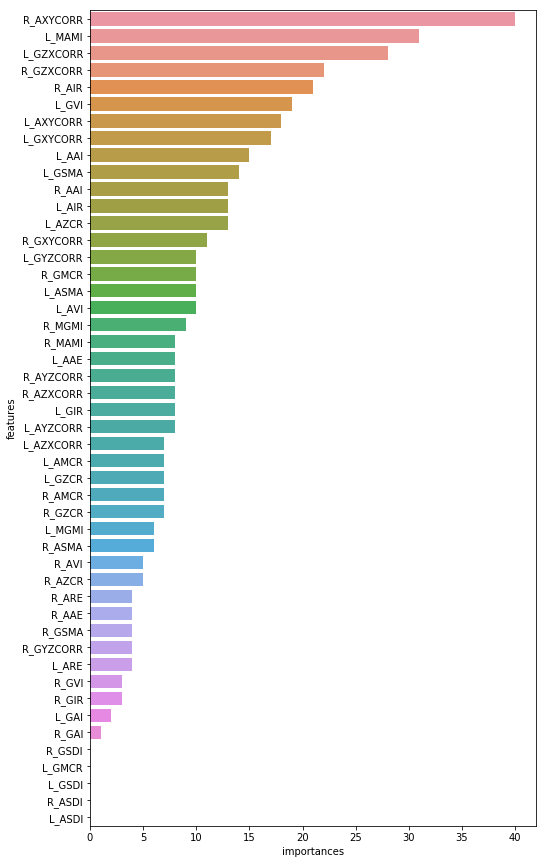

In [9]:
plot_df = pd.DataFrame({'features': train_df.columns[train_df.columns != 'hit_type'],
                        'importances': model.feature_importance()})
plot_df = plot_df.sort_values('importances', ascending=False)

plt.figure(figsize=(8, 15))
sns.barplot(x = plot_df.importances, y = plot_df.features)
plt.show()

In [10]:
y_test = []
for y_pred in [y_pred_1, y_pred_2]:
    predictions = []
    for x in y_pred:
        predictions.append(np.argmax(x))
    y_test.append(pd.Series(data=predictions))

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

Normalized confusion matrix
[[0.91836735 0.06530612 0.01632653]
 [0.19767442 0.79069767 0.01162791]
 [0.13333333 0.         0.86666667]]


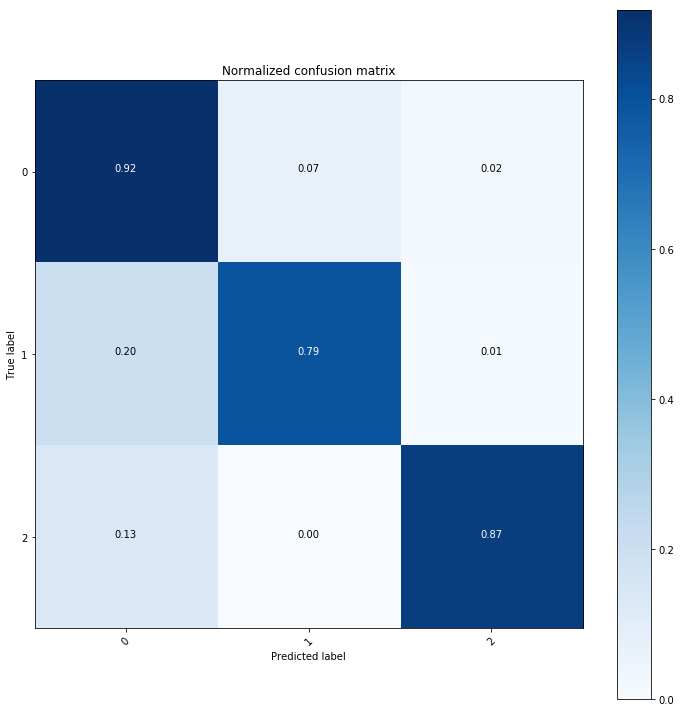

Normalized confusion matrix
[[0.88979592 0.09387755 0.01632653]
 [0.18604651 0.80232558 0.01162791]
 [0.06666667 0.         0.93333333]]


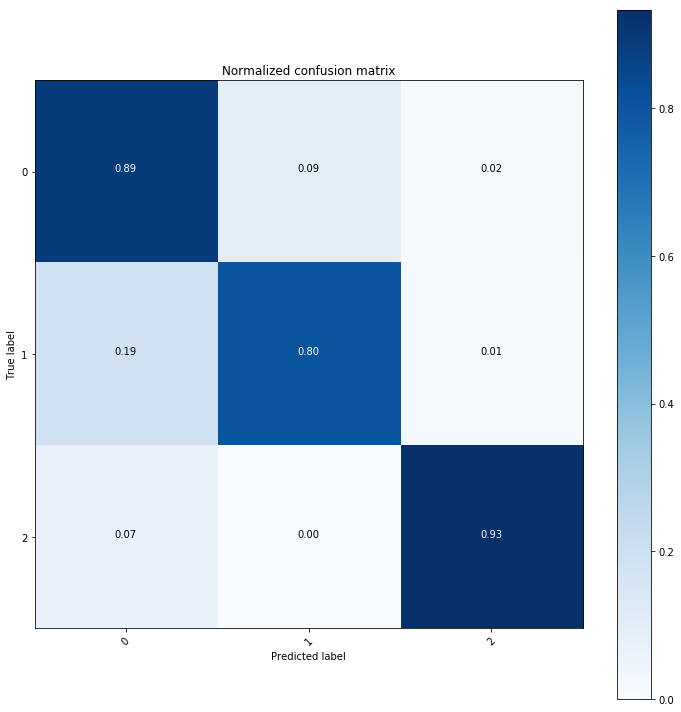

In [13]:
y_valid = [y_valid_1, y_valid_2]
for y_val, y_tst in zip(y_valid, y_test):
    cutstom_output_cnf_matrix(y_val, y_tst)